In [114]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


Import the dataset

In [115]:
df = pd.read_csv("dataset.csv")
print(df)

     Patient Id  Patient Age Genes in mother's side Inherited from father  \
0     PID0x4108          9.0                    Yes                    No   
1     PID0x79da         13.0                     No                    No   
2     PID0x2027         11.0                    Yes                    No   
3      PID0xb53          3.0                     No                   Yes   
4     PID0x8d3b          7.0                     No                    No   
...         ...          ...                    ...                   ...   
2429  PID0x7e53         12.0                     No                    No   
2430  PID0x7b6f          8.0                    Yes                    No   
2431  PID0x68b5          5.0                    Yes                    No   
2432  PID0x5037          2.0                     No                    No   
2433  PID0x1b43          1.0                     No                   Yes   

     Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name

In [116]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

Drop the irrevalent columns

In [ ]:

columns_to_drop = [
    'Patient Id', 'Patient First Name', 'Family Name', "Father's name",
    'Institute Name', 'Location of Institute', 'Genetic Disorder Name'
]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

Define the target column

In [118]:
target_col = 'Genetic Disorder'

 Detect numeric and categorical columns

In [119]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

 Replace placeholder values with np.nan

In [120]:

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(-99, np.nan)

    
for col in categorical_cols:
    df[col] = df[col].replace('-99', np.nan)


Encode Categorical Columns

In [121]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


scaler = StandardScaler()

Scale numerical Features

In [122]:

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


drop all null values

In [123]:
df.dropna(inplace=True)

In [ ]:

print("Preprocessing complete.")
print(f"Target column: {target_col}")

Preprocessing complete.
Target column: Genetic Disorder


In [125]:
feature_columns = [col for col in df.columns if col != target_col]


print(" Final dataset preview:")
print(df.head())


 Final dataset preview:
    Patient Age  Genes in mother's side  Inherited from father  Maternal gene  \
13    -1.596193                       0                      0              0   
15    -1.596193                       0                      1              0   
16     0.003335                       1                      2              1   
37    -0.225169                       1                      2              1   
51    -0.453673                       1                      0              1   

    Paternal gene  Blood cell count (mcL)  Mother's age  Father's age  Status  \
13              0               -0.174001      1.436300     -1.238467       1   
15              0               -1.378692     -0.764292      1.551014       0   
16              0               -0.066973     -0.264158      0.621187       1   
37              0                0.540989      0.035923     -1.470924       0   
51              1               -0.523701     -0.864319      0.001302       0   

  

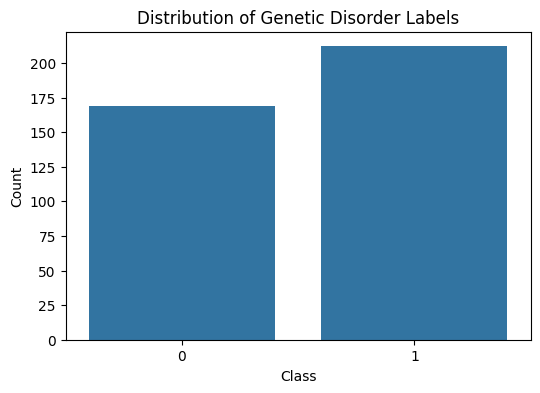

<Figure size 1400x1000 with 0 Axes>

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Genetic Disorder')  
plt.title("Distribution of Genetic Disorder Labels")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(14, 10))
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()




In [ ]:
Random Forest

Accuracy : 0.7662
Precision: 0.7727
Recall   : 0.7662
F1‑Score : 0.7606


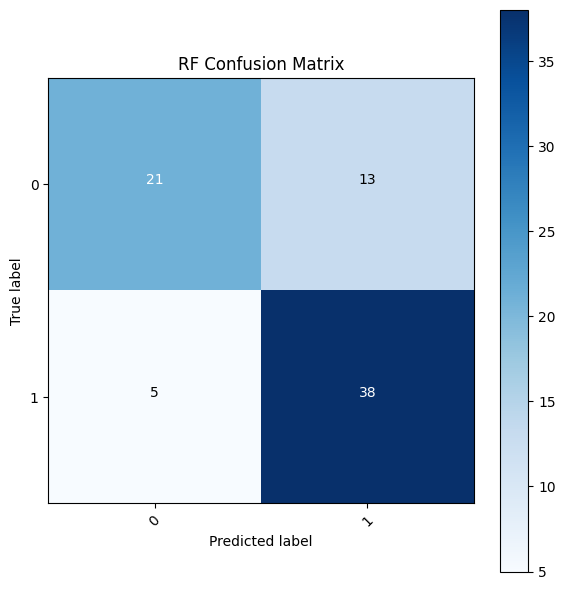

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)


X = df[feature_columns].values
y = df[target_col].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)




rf = RandomForestClassifier(
    n_estimators=120,   
    max_depth=None,      
    min_samples_leaf=60,  
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec  = recall_score(y_test, y_pred, average='weighted')
f1   = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1‑Score : {f1:.4f}")




cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("RF Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [ ]:
KNN

Accuracy : 0.8052
Precision: 0.8133
Recall   : 0.8052
F1‑Score : 0.8059


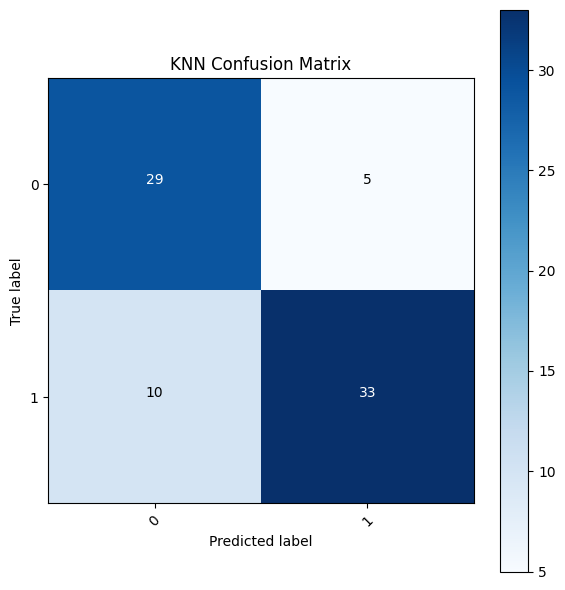

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)


X = df[feature_columns].values
y = df[target_col].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


knn = KNeighborsClassifier(
    n_neighbors=10,  
    weights='uniform',  
    metric='minkowski', 
    p=2
)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec  = recall_score(y_test, y_pred, average='weighted')
f1   = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1‑Score : {f1:.4f}")



cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [ ]:
CNN

Epoch 1/10


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5173 - loss: 0.6897  
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.6340 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7432 - loss: 0.6046 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.5541 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.5403 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8312 - loss: 0.4839 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8352 - loss: 0.4555 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.4487 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8428 - loss: 0.3776 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9086 - loss: 0.3372 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1D-CNN → Accuracy: 0.8182, Precision: 0.8187, Recall: 0.8182, F1-Score: 0.8179


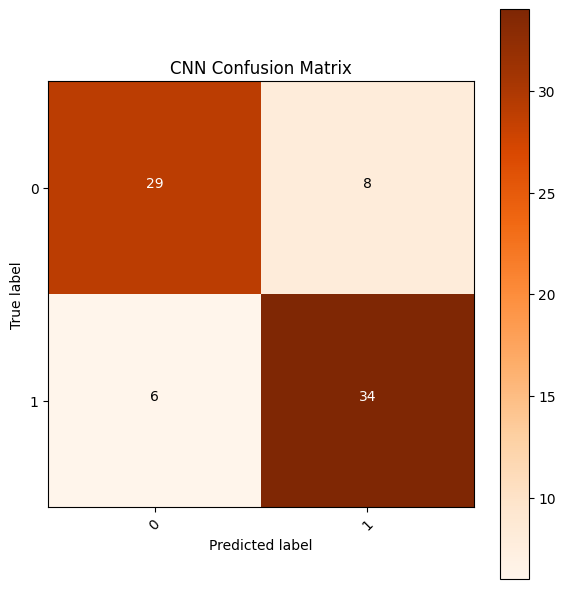

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


X = df[feature_columns].astype(np.float32).to_numpy()       
y = df[target_col].astype(np.int32).to_numpy()             


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


n_features = X_train.shape[1]
X_train_cnn = X_train.reshape(-1, n_features, 1)
X_test_cnn  = X_test.reshape(-1,  n_features, 1)


model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(n_features,1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)


y_pred = np.argmax(model.predict(X_test_cnn), axis=1)

print("1D-CNN →",
      f"Accuracy: {accuracy_score(y_test,y_pred):.4f},",
      f"Precision: {precision_score(y_test,y_pred,average='weighted'):.4f},",
      f"Recall: {recall_score(y_test,y_pred,average='weighted'):.4f},",
      f"F1-Score: {f1_score(y_test,y_pred,average='weighted'):.4f}")

cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title("CNN Confusion Matrix")
plt.colorbar()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             ha='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [ ]:
GRAPH NEURAL NETWORK

Epoch 0050 | Loss 0.3638 | Val Acc 0.8052
Epoch 0100 | Loss 0.1289 | Val Acc 0.8571
Epoch 0150 | Loss 0.0457 | Val Acc 0.8571
Epoch 0200 | Loss 0.0742 | Val Acc 0.8701
Epoch 0250 | Loss 0.0496 | Val Acc 0.8442
Epoch 0300 | Loss 0.0228 | Val Acc 0.8571
Epoch 0350 | Loss 0.0245 | Val Acc 0.8571
Epoch 0400 | Loss 0.0130 | Val Acc 0.8571
Epoch 0450 | Loss 0.0160 | Val Acc 0.8701
Epoch 0500 | Loss 0.0201 | Val Acc 0.8442
Epoch 0550 | Loss 0.0117 | Val Acc 0.8442
Epoch 0600 | Loss 0.0157 | Val Acc 0.8442
Epoch 0650 | Loss 0.0170 | Val Acc 0.8442
Epoch 0700 | Loss 0.0082 | Val Acc 0.8571
Epoch 0750 | Loss 0.0260 | Val Acc 0.8571
Epoch 0800 | Loss 0.0145 | Val Acc 0.8571
Epoch 0850 | Loss 0.0184 | Val Acc 0.8571
Epoch 0900 | Loss 0.0192 | Val Acc 0.8571
Epoch 0950 | Loss 0.0304 | Val Acc 0.8571
Epoch 1000 | Loss 0.0136 | Val Acc 0.8571

GNN model final results
Accuracy : 0.8571
Precision: 0.8612
Recall   : 0.8571
F1‐score : 0.8554



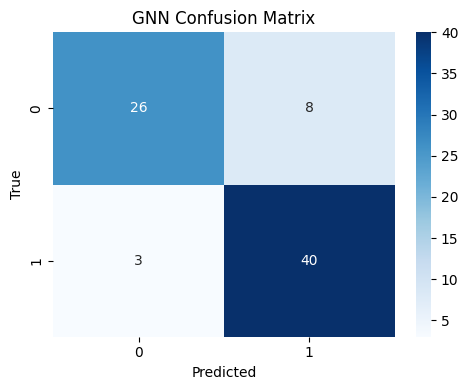

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import add_self_loops
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("dataset.csv")
drop_cols = [
    'Patient Id','Patient First Name','Family Name',"Father's name",
    'Institute Name','Location of Institute','Genetic Disorder Name'
]
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)
df.replace(['-99', -99], np.nan, inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))
df.dropna(inplace=True)

num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('Genetic Disorder')
df[num_cols] = StandardScaler().fit_transform(df[num_cols])

X = df.drop('Genetic Disorder', axis=1).values
y = df['Genetic Disorder'].values


classes = np.unique(y)
cw = compute_class_weight('balanced', classes=classes, y=y)
class_weight = torch.tensor([cw[list(classes).index(c)] for c in classes], dtype=torch.float)


A = kneighbors_graph(X, n_neighbors=2, include_self=False)
edge_index = torch.tensor(np.vstack(A.nonzero()), dtype=torch.long)
edge_index, _ = add_self_loops(edge_index, num_nodes=X.shape[0])


x = torch.tensor(X, dtype=torch.float)
y_t = torch.tensor(y, dtype=torch.long)
data = Data(x=x, edge_index=edge_index, y=y_t)

idx = np.arange(len(y))
train_idx, test_idx = train_test_split(idx, test_size=0.2, stratify=y, random_state=42)
mask = lambda arr: torch.tensor(arr, dtype=torch.bool)
data.train_mask = mask([i in train_idx for i in idx])
data.test_mask  = mask([i in test_idx  for i in idx])


class SageNet(torch.nn.Module):
    def __init__(self, in_dim, hid_dim, out_dim):
        super().__init__()
        self.s1 = SAGEConv(in_dim, hid_dim)
        self.s2 = SAGEConv(hid_dim, hid_dim)
        self.s3 = SAGEConv(hid_dim, out_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.s1(x, edge_index))
        x = F.dropout(x, p=0.7, training=self.training)
        x = F.relu(self.s2(x, edge_index))
        x = F.dropout(x, p=0.7, training=self.training)
        x = self.s3(x, edge_index)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SageNet(
    in_dim = x.shape[1],
    hid_dim=128,
    out_dim=len(classes)
).to(device)
data = data.to(device)
criterion = torch.nn.CrossEntropyLoss(weight=class_weight.to(device))
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

max_epochs = 1000
for epoch in range(1, max_epochs + 1):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    scheduler.step()

    if epoch % 50 == 0:
        model.eval()
        with torch.no_grad():
            logits = model(data)[data.test_mask]
            preds = logits.argmax(dim=1).cpu().numpy()
            truth = data.y[data.test_mask].cpu().numpy()
            acc = accuracy_score(truth, preds)
        print(f"Epoch {epoch:04d} | Loss {loss:.4f} | Val Acc {acc:.4f}")


model.eval()
with torch.no_grad():
    logits = model(data)[data.test_mask]
    preds = logits.argmax(dim=1).cpu().numpy()
    truth = data.y[data.test_mask].cpu().numpy()

print("\nGNN model final results")
print(f"Accuracy : {accuracy_score(truth, preds):.4f}")
print(f"Precision: {precision_score(truth, preds, average='weighted'):.4f}")
print(f"Recall   : {recall_score(truth, preds, average='weighted'):.4f}")
print(f"F1‐score : {f1_score(truth, preds, average='weighted'):.4f}\n")


cm = confusion_matrix(truth, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("GNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
